In [1]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

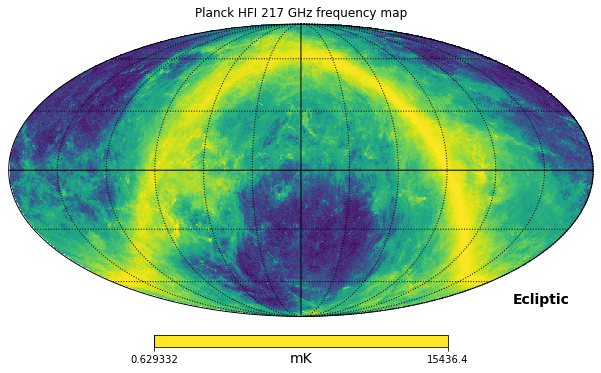

In [5]:
planck_path = '/n17data/jimenez/PLANCK/'
planck = hp.read_map(planck_path + "HFI_SkyMap_857-field-Int_2048_R3.00_full.fits")
hp.mollview(
    planck,
    coord=["G", "E"],
    title="Planck HFI 217 GHz frequency map",
    unit="mK",
    norm="hist",

)
hp.graticule()

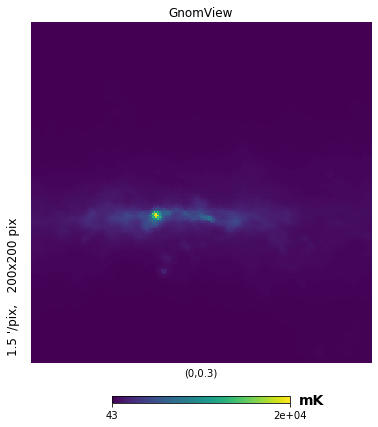

In [6]:
hp.gnomview(planck, rot=[0, 0.3], title="GnomView", unit="mK", format="%.2g")

In [8]:
LMAX = 1024
cl = hp.anafast(planck, lmax=LMAX)
ell = np.arange(len(cl))

/home/jimenez/.conda/envs/shapepipe/lib/python3.7/site-packages/healpy/fitsfunc.py:102: FutureWarning: The default dtype of write_cl() will change in a future version: explicitly set the dtype if it is important to you
  category=FutureWarning,


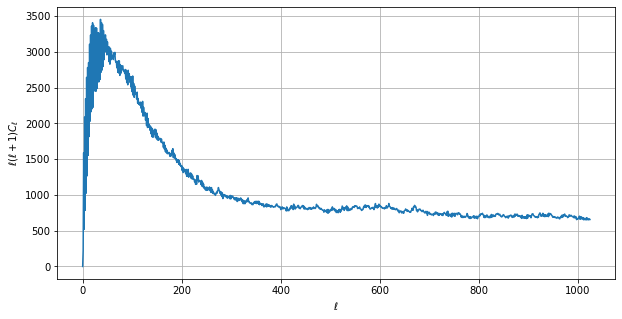

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()
hp.write_cl("cl.fits", cl, overwrite=True)

/home/jimenez/.conda/envs/shapepipe/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 2.547965 arcmin (0.000741 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/jimenez/.conda/envs/shapepipe/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 6.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


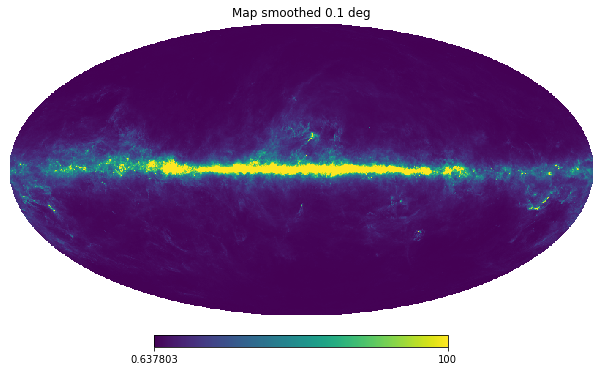

In [11]:
planck_smoothed = hp.smoothing(planck, fwhm=np.radians(0.1))
hp.mollview(planck_smoothed, max=100, title="Map smoothed 0.1 deg")

2021-04-02 13:43:47,826 -- DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f588e0c2820>
2021-04-02 13:43:47,826 -- DEBUG: Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f588e0c2820> on colorbar
2021-04-02 13:43:47,827 -- DEBUG: Setting pcolormesh
2021-04-02 13:43:47,879 -- DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f588dfe0be0>
2021-04-02 13:43:47,880 -- DEBUG: Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f588dfe0be0> on colorbar
2021-04-02 13:43:47,881 -- DEBUG: Setting pcolormesh
2021-04-02 13:43:47,921 -- DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f588c7978e0>
2021-04-02 13:43:47,922 -- DEBUG: Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f588c7978e0> on colorbar
2021-04-02 13:43:47,922 -- DEBUG: Setting pcolormesh
2021-04-02 13:43:47,966 -- DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocat

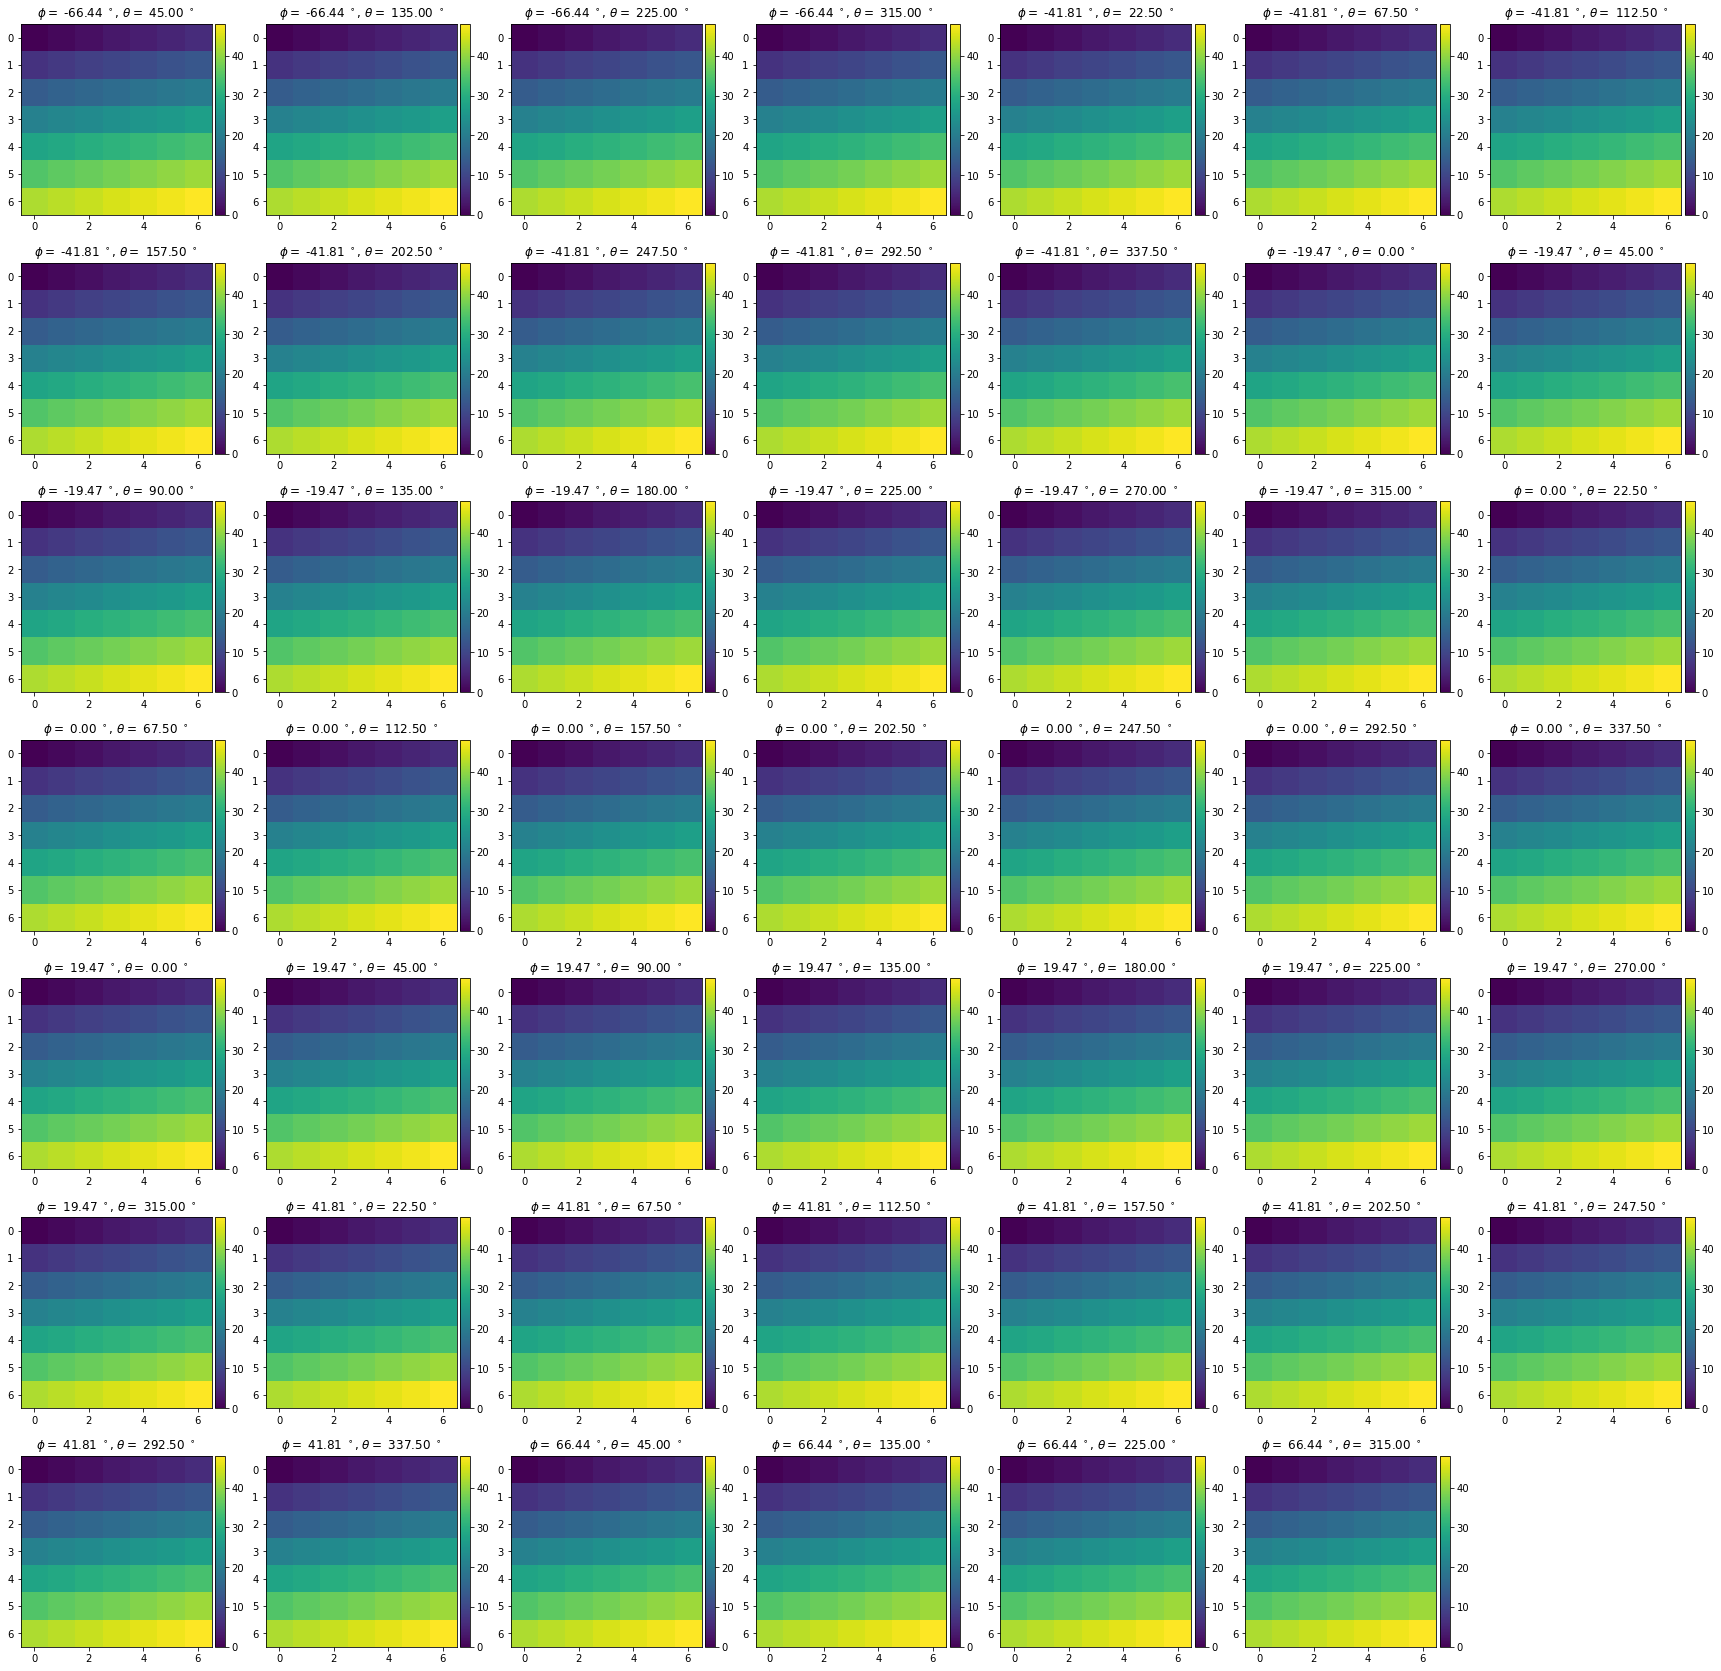

In [6]:
from hpproj import CutSky, to_coord
from mpl_toolkits.axes_grid1 import make_axes_locatable

NSIDE = 2
m = np.arange(hp.nside2npix(NSIDE))
angles = hp.pix2ang(NSIDE, m)
angles = [angles[0]*(180/np.pi)-90, angles[1]*(180/np.pi)]
coords = np.zeros((len(m), 2))
for i in range(len(m)):
    coords[i] = angles[1][i], angles[0][i]
pixsize = np.sqrt(860/40)
print('npix = {:.2f}'.format(pixsize))

maps = [(planck_path + "HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits", {'legend': 'HFI 100', 'aperture': [1, 2, 3]}),
        (planck_path + "HFI_SkyMap_857-field-Int_2048_R3.00_full.fits", {'legend': 'HFI 857', 'docontour': True})]

cutsky = CutSky(maps, npix=40, pixsize=pixsize, low_mem=False)
m = np.array(list(m) + [48])
fig = plt.figure(figsize=(30,30), tight_layout=False)
for i,co in enumerate(coords):
        ax = fig.add_subplot(7,7,1+i)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.05)
        coord = to_coord(co)
        result = cutsky.cut_fits(coord) # Will only produce the 'fits' key

        HDU_100 = result[0]['fits']
        HDU_857 = result[1]['fits']
        # a = np.reshape(m, (7,7))
        im = ax.imshow(HDU_857.data)
        ax.set_title(r'$\phi=$ {:.2f} $^\circ$, $\theta=$ {:.2f} $^\circ$'.format(co[1], co[0]))
        fig.colorbar(im, cax=cax, orientation='vertical')
        

plt.show()

/home/xavier/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/xavier/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/xavier/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify

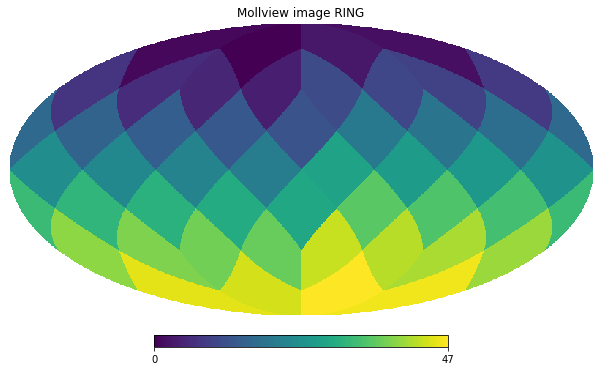

In [1]:
import numpy as np
import healpy as hp
NSIDE = 2
m = np.arange(hp.nside2npix(NSIDE))
hp.mollview(m, title="Mollview image RING")

In [29]:
print(m)
angles = hp.pix2ang(2,m)
angles = [angles[0]*(180/np.pi)-90, angles[1]*(180/np.pi)]
print(angles[0])
print(angles[1])
coords = np.zeros((len(angles[0]), 2))
for i in range(len(angles[0])):
    coords[i] = angles[0][i], angles[1][i]
npix = np.sqrt(860/40)
print('npix = {:.2f}'.format(npix))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
[-66.44353569 -66.44353569 -66.44353569 -66.44353569 -41.8103149
 -41.8103149  -41.8103149  -41.8103149  -41.8103149  -41.8103149
 -41.8103149  -41.8103149  -19.47122063 -19.47122063 -19.47122063
 -19.47122063 -19.47122063 -19.47122063 -19.47122063 -19.47122063
   0.           0.           0.           0.           0.
   0.           0.           0.          19.47122063  19.47122063
  19.47122063  19.47122063  19.47122063  19.47122063  19.47122063
  19.47122063  41.8103149   41.8103149   41.8103149   41.8103149
  41.8103149   41.8103149   41.8103149   41.8103149   66.44353569
  66.44353569  66.44353569  66.44353569]
[ 45.  135.  225.  315.   22.5  67.5 112.5 157.5 202.5 247.5 292.5 337.5
   0.   45.   90.  135.  180.  225.  270.  315.   22.5  67.5 112.5 157.5
 202.5 247.5 292.5 337.5   0.   45.   90.  135.  180.  225.  270.  315.
  22.5  67.